# Bölüm 11: Makine Öğrenmesi III - Doğrusal Olmayan Regresyon Modelleri

Sınıflandırma ve regresyon klasik makine öğrenme algoritmalarının gözetimli öğrenme basamağında yer almaktadır. Sınıflandırma ve regresyon modelleri ortak amaçlar için kullanılmakla beraber her iki modelde de elde edilen fonksiyonlarda açıklanan değişkenin nitel veya nicel olması yöntemler arası farka sebep olmaktadır. Bir sınıflandırma modeli bir hastalık türü için başvurulan ilaçların yan etkilerini gruplandırmak amacıyla oluşturulurken; bir regresyon modeli, bina yaşı, bulunduğu kent bilgisi ve oda sayısı gibi bilgiler ile evlerin kira fiyatını tahmin etmek için oluşturulabilir. 

Ek olarak, bu iki modelin bir arada kullanıldığı analizlerde yapılmaktadır. Çok terimli lojistik regresyon analizinde nitel değerler tahmin edilerek, bu iki model birbirine yaklaşmakta ve beraber kullanılabilmektedir.

# Python ile Makine Öğrenmesi: Polinomal Regression

In [1]:
#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# veri yukleme
veriler = pd.read_csv('maaslar.csv')

x = veriler.iloc[:,1:2]
y = veriler.iloc[:,2:]
X = x.values
Y = y.values

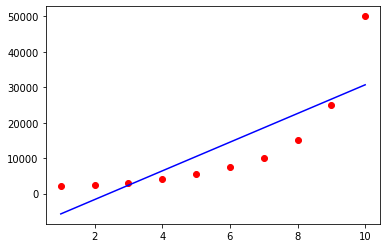

In [3]:
#linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

plt.scatter(X,Y,color='red')
plt.plot(x,lin_reg.predict(X), color = 'blue')
plt.show()

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


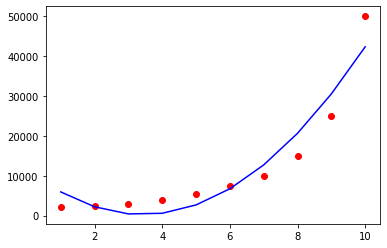

In [4]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(X)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.show()

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


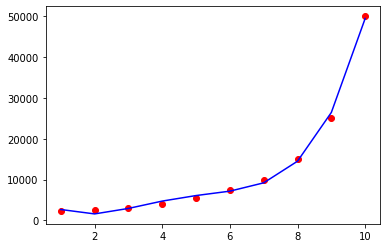

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg3 = PolynomialFeatures(degree = 4)
x_poly3 = poly_reg3.fit_transform(X)
print(x_poly3)
lin_reg3 = LinearRegression()
lin_reg3.fit(x_poly3,y)
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg3.predict(poly_reg3.fit_transform(X)), color = 'blue')
plt.show()

In [6]:
#tahminler

In [7]:
print(lin_reg.predict([[11]]))
print(lin_reg.predict([[6.6]]))

[[34716.66666667]]
[[16923.33333333]]


In [8]:
print(lin_reg2.predict(poly_reg.fit_transform([[11]])))
print(lin_reg2.predict(poly_reg.fit_transform([[6.6]])))

[[56091.66666667]]
[[10083.33333333]]


In [9]:
print(lin_reg3.predict(poly_reg3.fit_transform([[6.6]])))
print(lin_reg3.predict(poly_reg3.fit_transform([[11]])))

[[8146.9948718]]
[[89041.66666669]]


# Doğrusal Olmayan Regreson Modelleri

In [10]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# KNN

*Tahminler gözlem benzerliğine göre yapılır.*
*Bana arkadaşını söyle sana kim olduğunu söyleyeyim.*

Genel amaç gözlem değerleri dışından gelen gözlemin her bir gözlem değerine olan uzaklığı (öklid) vb. yöntemlerle hesaplanır ve sonuçların ortalaması alınır. Çıkan ortalama belirlenen en yakın komşu değerlerinin ortalaması alınarak tahmin değeri olarak atanır.

KNN Basamakları:

* K katsayısını belirle
* Bilinmeyen nokta ile diğer tüm noktalar ile arasındaki uzaklıkları hesapla
* Uzaklıkları sırala ve atanan k değerine göre en yakın k gözlemi seç
* Sınıflandırma ise en çok tekrar edeni, regresyon ise ortalamaları tahmin değeri olarak atanır.

## Model Kurulması

In [11]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [12]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [13]:
knn_model # model nesnesi

KNeighborsRegressor()

In [14]:
knn_model.n_neighbors # komşuluk kat sayısı

5

In [15]:
knn_model.effective_metric_

'euclidean'

## Tahmin

In [16]:
y_pred = knn_model.predict(X_test)

In [17]:
np.sqrt(mean_squared_error(y_test, y_pred)) # Test hatası

426.6570764525201

In [18]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.64671325413764
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


## Model Tuning

GridSearchCV bütün makine öğrenmesi modellerinde ızgara ile olası tüm kombinasyonları deneyerek hiperparametre tespitinde cross validation kullanılarak hesaplanır.

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
np.arange(1,30,1) # 1 den 30 akadar komşuluk değerleri

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [21]:
knn_params = {'n_neighbors': np.arange(1,30,1)}
# dict kullanarak GridSearch içinde aranacak parametre yazdık

In [22]:
knn = KNeighborsRegressor()

In [23]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
# cross-validation uyguladık

In [24]:
knn_cv_model.fit(X_train, y_train) # model fit etme

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

Hata gelirse,

- from warnings import filterwarnings
- filterwarnings('ignore')

In [25]:
knn_cv_model.best_params_["n_neighbors"]
# en uygun parametre

8

In [26]:
# Hata değer karelerin ortalaması - Root mean square deviation
RMSE = [] # valide edilmemiş (test ve train üzerinden direkt train hatası hesaplama)
RMSE_CV = [] # # valide edilmiş (valide edilmiş model üzerinden elde edilen train hatası)
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.39475147063825
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.64671325413764 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


RMSE_CV 283 ile 301 arasında değişmiş, küçük olanı aramayız. RMSE en küçük 179 fakat RMSE için oluşan sonuçlar %80 lik train seti için geçerlidir. GridSearchCV yöntemiyle cross validation yöntemiyle elde ettiğimiz parametre sayısı ise k=8 dir(291.986).
Doğrulanmış model üzerinden değerlendir.

Cross-validationdan önceki hata kareleri ortalamamız daha küçük gözüküyor olsa da dikkat etmemiz gereken sonuç bu değildir. Cross-validation ile elde ettiğimiz değerler arasındaki açıklık daha küçüktür bu yüzden bu sonuçlar daha iyi sonuçlar verir.

Cross-validation yöntemi ile tespit ettiğimiz k değerini knn_cv_model.best_params_[“n_neighbors”] ile knn_tuned modelimize belirleyerek gönderiyoruz.

In [27]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [28]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [29]:
# Knn ile tune edilmiş modelin test hatasını hesapla
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

# SVR (Destek Vektör Regresyonu)

Destek vektör algoritması ilk başta sınıflandırma için çıkmış bir algoritma olmasına rağmen zamanla regresyon içinde kullanılmaktadır. Destek vektör regresyonu uyguladığımızda, çizeceğimiz aralığın maksimum noktayı içerisine almasını sağlamaktır. Bu çizilen maksimum aralıkların kestiği noktalara destek noktaları adı verilmektedir.

**Amaç, bir marjin aralığına maksimum noktayı en küçük hata ile alabilecek şekilde doğru ya da eğriyi belirlemektir.**

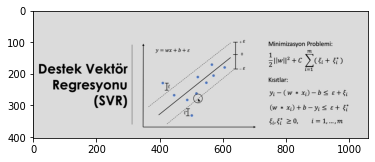

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread("SVR.png"))

Regresyon doğrusu etrafındaki Epsilon ifadesi hata miktarıdır. 

Aykırı değerlerimiz belirlediğimiz ceza parametresi “C” etkisinde Doğrumuzun konum ve eğrisini belirliyor. 

Gerçek değerler ile tahmin edilen değerler arasındaki farklar regresyon eğrisinin iki yönünden belirli epsilon ifadesinden uzun olamayacaktır.

Kabul edilebilir hata miktarı eğriyi belirler. 

## Model Kurulumu

In [31]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [32]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [33]:
from sklearn.svm import SVR

In [34]:
svr_model = SVR("linear").fit(X_train, y_train)

In [35]:
svr_model.predict(X_train)[0:5] # tahmin

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [36]:
# SVR ın regresyon formülü (model denklemi)
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) # iki parantez sebebi array den kurtarmak için 

y = -48.69756097561513 + 4.969512195122093 x


In [37]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [38]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [39]:
y_pred = svr_model.predict(X_train)

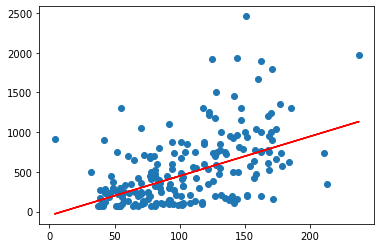

In [40]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color = "r")

In [41]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334345 + 5.172456135470686 x


In [42]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

Text(0, 0.5, 'Maaş (Salary)')

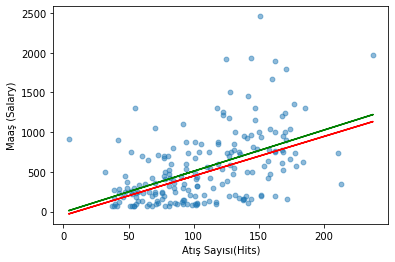

In [43]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g') # Lineer Regression -> 461.87
plt.plot(X_train, y_pred, color='r') # SVR -> 403.52

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

SVR modelinde 91.0 hits ile  403 maaş tahminini vermiştir.
Lineer regresyon modeli daha yukarıda olduğu için daha yüksek bir tahmin verecektir.

Neden SVR daha aşağıdadır?
EKK (en küçük kareler) den kaynaklı aykırı değerlerin etkisi SVR da daha düşüktür.

## Tahmin

In [44]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [45]:
svr_model.predict([[91]])

array([403.52804878])

In [46]:
y_pred = svr_model.predict(X_test) # Test Hatası

In [47]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [48]:
svr_model

SVR(kernel='linear')

## Model Tuning

In [49]:
svr_model

SVR(kernel='linear')

In [50]:
svr_params = {"C": np.arange(0.1,2,0.1)} # tuple ile ceza parametresi
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [51]:
svr_cv_model.best_params_

{'C': 0.1}

In [52]:
pd.Series(svr_cv_model.best_params_)[0] # modelde real bir number olması için

0.1

In [53]:
svr_tuned = SVR("linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [54]:
y_pred = svr_tuned.predict(X_test)

In [55]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

svr_cv_model nesnesini direkt model nesnesi gibi kullanıp tune edilmiş parametreyi de kullanabilirsiniz. Biz (svr_cv_model.best_params_)[0] ile yeni bir model oluşturarak test hatamızı hesapladık. Daha az C parametresi ile de modeli çalıştırabilirsiniz. İşlemcinin %20 sinden fazlasını kullanmak için belli ayarlar yapılır.

In [56]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [57]:
svr_params = {"C": np.arange(0.1,2,0.1)} # tuple ile ceza parametresi
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [58]:
pd.Series(svr_cv_model.best_params_)[0]

0.4

In [59]:
svr_tuned = SVR("linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [60]:
y_pred = svr_tuned.predict(X_test)

In [61]:
np.sqrt(mean_squared_error(y_test, y_pred))

367.5385297249052

Öncekinde sadece Hits değişkeni vardı. Modelimizde maaş tahminini hesaplarken bağımsız değişkenleri arttırdığımızda modelimizi çalıştırmak 16 dk sürdü. Hata değerimiz azalmıştır.

# Doğrusal Olmayan SVR

Suni veri seti üstünden aykırı gözlemleri görselleştirelim.

In [62]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [63]:

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

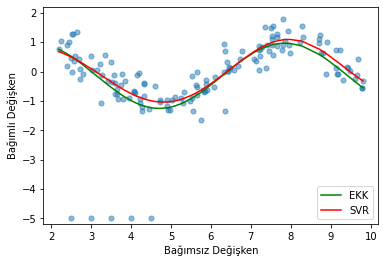

In [64]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [65]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [66]:
svr_rbf = SVR("rbf").fit(X_train, y_train) # model kurma

## Tahmin

In [67]:
y_pred = svr_rbf.predict(X_test)

In [68]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

## Model Tuning

In [69]:
svr_rbf # epsilonu ön tanımlı değeriyle kabul edelim

SVR()

In [70]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [71]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [72]:
svr_tuned = SVR("rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)

In [73]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))
# En yüksek hatayı aldık. Bazı veri yapılarında farklı modeller daha iyi açıklayabilir.

428.00406888095694

# Yapay Sinir Ağları (YSA)

İnsan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından birisidir.

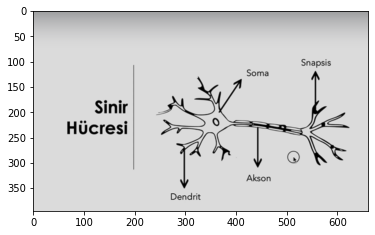

In [74]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread("ysa.png"))

SVR gibi aslında sınıflandırma problemleri için geliştirilmiş bir algoritam olmasına rağmen regresyon modelleri içinde kullanılmaktadır. İnsan beyninin bilgi işleme tekniğinden esinlenerek geliştirilmiştir.
Yani biyolojik nöron hücrelerinin ve bu hücrelerin birbirleri ile arasında kurduğu sinaptik bağın dijital olarak modellenmesidir.

Biyolojik sistemlerde öğrenme, nöronlar arasındaki sinaptik (synaptic) bağlantıların ayarlanması ile olur. Yani, insanlar doğumlarından itibaren bir yaşayarak öğrenme süreci içerisine girerler. Bu süreç içinde beyin sürekli bir gelişme göstermektedir. Yaşayıp tecrübe ettikçe sinaptik bağlantılar ayarlanır ve hatta yeni bağlantılar oluşur. Bu sayede öğrenme gerçekleşir.

Bu durum YSA için de geçerlidir. Öğrenme, eğitme yoluyla örnekler kullanarak olur; başka bir deyişle, gerçekleşme girdi/çıktı verilerinin işlenmesiyle, yani eğitme algoritmasının bu verileri kullanarak bağlantı ağırlıklarını (weights of the synapses) bir yakınsama sağlanana kadar, tekrar tekrar ayarlamasıyla olur.

Geleneksel işlemcilerde, tek bir merkezi işlem birimi her hareketi sırasıyla gerçekleştirir. YSA’lar ise her biri büyük bir problemin bir parçası ile ilgilenen, çok sayıda basit işlem birimlerinden oluşmaktadır. En basit şekilde, bir işlem birimi, bir girdiyi bir ağırlık kümesi ile ağırlıklandırır, doğrusal olmayan bir şekilde dönüşümünü sağlar ve bir çıktı değeri oluşturur.

*1.Girdiler: Girdiler nöronlara gelen verilerdir. Bu girdilerden gelen veriler biyolojik sinir hücrelerinde olduğu gibi toplanmak üzere nöron çekirdeğine gönderilir.*

*2.Ağırlıklar: Yapay sinir hücresine gelen bilgiler girdiler üzerinden çekirdeğe ulaşmadan önce geldikleri bağlantıların ağırlığıyla çarpılarak çekirdeğe iletilir. Bu sayede girdilerin üretilecek çıktı üzerindeki etkisi ayarlanabilinmektedir.*

*3.Toplama Fonksiyonu (Birleştirme Fonksiyonu): Toplama fonksiyonu bir yapay sinir hücresine ağırlıklarla çarpılarak gelen girdileri toplayarak o hücrenin net girdisini hesaplayan bir fonksiyondur.*

*4.Aktivasyon fonksiyonu: Önceki katmandaki tüm girdilerin ağırlıklı toplamını alan ve daha sonra bir çıkış değeri (tipik olarak doğrusal olmayan) üreten ve bir sonraki katmana geçiren bir fonksiyondur. (örneğin, ReLU veya sigmoid ).*

*5.Çıktılar: Aktivasyon fonksiyonundan çıkan değer hücrenin çıktı değeri olmaktadır. Her hücrenin birden fazla girdisi olmasına rağmen bir tek çıktısı olmaktadır. Bu çıktı istenilen sayıda hücreye bağlanabilir.*

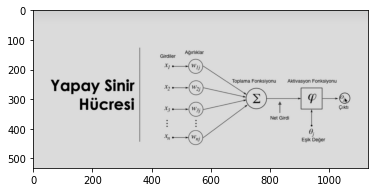

In [75]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread("ysa2.png"))

Yapay sinir ağları üç ana katmanda incelenir; Giriş Katmanı, Ara (Gizli) Katmanlar ve Çıkış Katmanı.

Bilgiler ağa girdi katmanından iletilir. Ara katmanlarda işlenerek oradan çıktı katmanına gönderilirler. Bilgi işlemeden kasıt ağa gelen bilgilerin ağın ağırlık değerleri kullanılarak çıktıya dönüştürülmesidir. Ağın girdiler için doğru çıktıları üretebilmesi için ağırlıkların doğru değerlerinin olması gerekmektedir.

**Katman Sayısının Model Verimliliğine Etkisi Nedir ?**
Bir katmandaki nöron sayısı arttıkça ağırlık sayıları ve bias değerleri artacaktır. Bu durumda öğrenilmesi gereken parametre sayısında da artış olacaktır. Katman sayısı arttıkça öğrenme performansı artar gibi görünse de bu doğru değildir. Çünkü model performansı girdiler ve katman sayısına bağlı olsa da sadece bu iki değer ile belirlenmez

**Sinir Ağları Türleri Nelerdir ?**
*Beslemeli sinir ağları*

Beslemeli sinir ağları, verileri girdi düğümünden çıktı düğümüne olmak üzere tek yönde işler. Bir katmandaki her düğüm, bir sonraki katmandaki her bir düğüme bağlıdır. Beslemeli bir ağ, tahminleri zaman içinde iyileştirmek için bir geri bildirim sürecinden yararlanır.

*Geri Sayılım Algoritması*

Yapay sinir ağları, tahmine dayalı analizlerini geliştirmek için düzeltici geri bildirim döngülerini kullanarak sürekli olarak öğrenir. Basitçe, sinir ağındaki pek çok farklı yolda girdi düğümünden çıktı düğümüne akan verileri düşünebilirsiniz. Girdi düğümünü, doğru çıktı düğümüyle eşleştiren yalnızca bir doğru yol vardır. Sinir ağı, bu yolu bulmak için aşağıdaki gibi çalışan bir geri bildirim döngüsü kullanır:

* Her düğüm, yoldaki bir sonraki düğüm hakkında bir tahminde bulunur.
* Tahminin doğru olup olmadığını kontrol eder. Düğümler, daha doğru tahminler sunan yollara daha yüksek ağırlık değerleri ve yanlış tahminler sunan düğüm yollarına daha düşük ağırlık değerleri tayin eder.
* Düğümler, bir sonraki veri noktası için daha yüksek ağırlık değerine sahip yolları kullanarak yeni bir tahminde bulunur ve ardından 1. Adımı tekrarlar.

SSE veya SSR -> hata kareler toplamı nı 

minimize edecek şekilde modeller oluşturulur.

YSA genel olarak overfit etmeye eğilimlidir. Bununla mücadele etmek için EarlyStopping, Weight Decay gibi yöntemler geliştirilmiştir. Yapay Sinir ağlarının Lasso gibi regresyonlardan farkı katmanlar içermesidir.

# Çok Katmanlı Algılayıcı

In [76]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

Ortalamayı kaldırarak ve birim varyansa ölçeklendirerek özellikleri standartlaştırma işlemi yapıyoruz. Merkezleme ve ölçekleme, eğitim setindeki örnekler üzerindeki ilgili istatistikleri hesaplayarak her bir özellik üzerinde bağımsız olarak gerçekleşir. Ortalama ve standart sapma daha sonra kullanılarak daha sonraki verilerde kullanılmak üzere saklanır.

Bir veri kümesinin standardizasyonu, birçok makine öğrenimi tahmincisi için ortak bir gereksinimdir: bireysel özellikler az çok standart normal dağıtılmış verilere benzemiyorsa kötü davranabilirler.

Örneğin, bir öğrenme algoritmasının amaç fonksiyonunda kullanılan birçok öğe (Destek Vektör Makinelerinin RBF çekirdeği veya doğrusal modellerin L1 ve L2 düzenleyicileri gibi), tüm özelliklerin 0 etrafında ortalandığını ve aynı sırada varyansa sahip olduğunu varsayar. Bir özelliğin varyansı diğerlerinden daha büyükse, amaç fonksiyonuna hükmedebilir ve tahmincinin beklendiği gibi diğer özelliklerden doğru bir şekilde öğrenememesine neden olabilir.

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [79]:
X_train_scaled = scaler.transform(X_train) # dönüştürülmüş ölçeklendirme işlemi

In [80]:
X_test_scaled = scaler.transform(X_test)

In [81]:
from sklearn.neural_network import MLPRegressor

In [82]:
#Modelin Kurulması
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [83]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

Yapay sinir ağlarının üç ana katmandan oluştuğunu daha öncede belirtmiştik.  Giriş Katmanı, Ara (Gizli) Katmanlar ve Çıkış Katmanı

In [84]:
mlp_model.n_layers_ # katman sayısı (gizli katman sayısı 2 oduğunda katman sayısı 4)

4

In [86]:
mlp_model.hidden_layer_sizes # gizli katmandaki eleman sayısı yani nöron sayısı

(100, 20)

## Tahmin

In [87]:
y_pred = mlp_model.predict(X_test_scaled) #Y tahmin değeri

In [88]:
np.sqrt(mean_squared_error(y_test, y_pred)) #İlkel test hatası

527.4270090447499

SVR modelinin ilkel test hatası ile kıyasladığımızda modelimizin tune edilmiş halinden daha yüksek bir hatadır.

## Model Tuning

In [90]:
mlp_model
# Paramaterlerimizi liste içerisinde belirliyoruz, Katman sayıları ve katmanlardaki nöron sayıları

MLPRegressor(hidden_layer_sizes=(100, 20))

In [91]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005], # parametreler
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)], #2 katmanlı, 3 katmanlı, 3 katmanlı
             'activation': ['relu','logistic']} # aktivayson fonksiyonu

In [92]:
#Modelimizi Cross-validation ile en iyi değerleri arıyoruz.
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [93]:
#Kurduğumuzmodeli train setlerimiz ile eğitiyoruz.
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [94]:
#Belirlediğimiz kriterler altında en iyi çözümü veren parametleri görüyoruz.
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [99]:
#Modelimizi en iyi parametreler ile tekrar eğitiyoruz (Tune Model)
mlp_tuned = MLPRegressor(alpha = 0.01, hidden_layer_sizes = (100,50,150))

In [100]:
mlp_tuned.fit(X_train_scaled, y_train) # (bağımsız, bağımlı)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(100, 50, 150))

In [101]:
#Testsetimiz ile y tahminlemelerinde bulunuyoruz.
y_pred = mlp_tuned.predict(X_test_scaled)

In [102]:
#Test Değerleri ve Tahmin değerleri ile Hata Karaler ortalamasını tespit ediyoruz.
np.sqrt(mean_squared_error(y_test, y_pred))
# En düşük test hatasını bu ysa modeli vermiştir :)

358.23719573003655

# Regression Trees (KARAR AĞAÇLARI)

Amaç veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir.

Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

Karar ağaçları da hem sınıflandırma hem de regresyon için kullanılmaktadır. Karar ağaçları, doğrusal olmayan ilişkilerin, karma veri türlerinin ve aykırı değerlerin olduğu veri setlerinde sınıflandırma modelinin çıkarılmasına imkân verir. Karar ağaçları karar teorisi, sınıflama, tahmin ve kümeleme hallerinde kullanılmaktadır. Hedef değişkenin sürekli olması durumunda karar ağaçları regresyon ağaçları olarak, kategorik ise sınıflama ağaçları olarak adlandırılmaktadır. Bu farklı duruma karşın karar ağaçlarının kurulma biçimleri benzerlik göstermektedir.

Karar ağaçlarının yapısı kök düğüm, düğüm ve dallardan oluşmaktadır. Kök düğümden aşağı indikçe veri kümeleri küçük parçalara arılarak yeni düğüm ve dallar oluşturmaktadır. Her bir düğüm bir soruyu temsil etmekte ve verilen her bir yanıt düğümden farklı dalları oluşturmaktadır.

**Karar Ağaçlarında Algoritma Seçimi**

Veri madenciliği çalışmalarında algoritmaların temel kullanım amacı milyonlarca veri yığını arasından anlamlı örüntülere ulaşmayı sağlayacak kuralları oluşturmasıdır. Algoritma seçimi başta uygulanacak modelin ve veri setinin özelliklerine bağlıdır. Algoritma seçimi model başarısını önemli derecede etkilemektedir. Modelinizden aldığınız doğruluk oranı her zaman sizin başarılı bir model kurup kurmadığınızı belirlemede yeterli değildir. Başarılı bir modeli modelin çalışma süresi de etkilemektedir. Bu yüzden algoritma seçimi modeller üzerinde önemli bir dereceye sahiptir.

Karar ağaçları algoritmaları; AID (Automatic Interaction Detector Algorithm), CHAID (Chi-Squared Automatic Interaction Detector), CART (Classification and Regression Trees), ID3, C4.5, C5.0, SLIQ (Supervised Learning in Quest), SPRINT (Scalable Parallelizable Induction of Decision Trees), QUEST (Quick, Unbiased, Efficient Statistical Tree), MARS (Multivariate Adaptive Regression Splines) ve Exhaustive CHAID şeklindedir. Karar ağaçları algoritmaları kök, düğüm ve dallanma kriterlerinin seçiminde izlenen yol açısından birbirinden ayrılmaktadır. Karar ağaçlarında seçilen algoritmaya bağlı olarak ağaç şeklinin değişmesi farklı sınıflandırma sonuçlarını vermektedir.

Doğrusallıktan kurtulduğu için çok fazla dallanmalar olabiliyor. Fakat aşırı dallanma olduğunda overfitting oluşur. Karmaşıklık parametresini(cez parametresi) kullanarak belirli bir eşik değeri belirleyerk bölünmeyi durduruz.

# CART
## Classification and Regression Trees

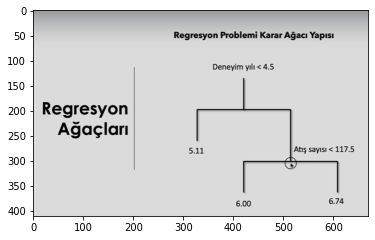

In [103]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread("cart.png"))

In [106]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

Train-Test olarak ayırdığım X_train ve X_testin içindeki Atış değişkenini dataFrame çeviriyoruz

In [107]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

Modelimizi DecisionTreeRegressor kütüphanesi yardımı ile tanımlıyoruz. min_samples_split parametresi;
Bir dahili düğümü bölmek için gereken minimum örnek sayısını tanımlamamıza yarıyor. yani her düğüm için minumum 2 dala ayrılmaktadır. Yani Arka planda if-else den oluşan bir yapı oluşturmaktadır. Sayımızı arttırdıkça if-elif-else yapısı belirdeğimiz sayıya göre şekillenecektir.
min_sample_leaf ise Bir yaprak düğümde olması gereken minimum numune sayısını verir. Bu gibi parametreler hakkında bilgi almak için
“?cart_model” çalıştırabilirsiniz.

In [108]:
# cart_model = DecisionTreeRegressor(max_lead_nodes = 2)
cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [110]:
#?cart_model

Modelimizi eğitim setlerimiz ile fit ediyoruz.

In [111]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

X_train ve y_train i kullanarak bir korelasyon grafiği oluşturuyoruz. Regresyon grafiğinde Noktalar arsındaki Regresyon ağacının çizgilerini göstermek için X_grid adı altında bir değişken oluşturuyoruz. Bu değişkeni oluşturmak için x_train içinde yer alan max ve min değerlerini alarak 0.01 artış ile beraber bir numpy vektörü oluşturuyoruz.

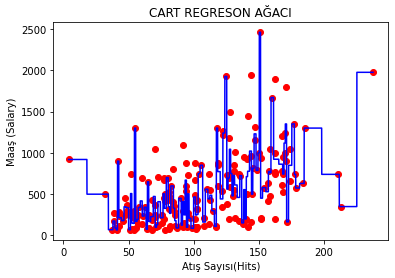

In [112]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

Belli bir kural modunu python kod olarak tanımlamak için aşağıdaki kütüphaneyi kullanabilirsiniz.

In [113]:
#!pip install skompiler

In [117]:
!pip install astor

In [118]:
from skompiler import skompile

In [119]:
print(skompile(cart_model.predict).to('python/code'))

((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666667 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.16650000000004 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((
    505.0 if x[0] <= 

Yukarda kullandığımız skompiler kütüphanesi ile modelimiz içinde predict ettiğimiz tahmin değerlerini python code çevirmiştik. Bu kod ile tahmin işlemlerimiz gerçekleştirebiliriz.

## Tahmin

In [120]:
x = [91]

In [121]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

Her zaman yaptığımız gibi tahminleme ve hata kareler ortalamasını yazdıralım

In [122]:
cart_model.predict(X_test)[0:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [123]:
cart_model.predict([[91]])

array([125.])

In [124]:
y_pred =cart_model.predict(X_test)

In [125]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

## Model Tuning

Cart modelimizin alacağı parametlerden min_samples_split ve max_leaf_nodes parametrelerini 2–100 e kadar 1 er 1 er artan bir bir aralık olarak belirledik. Belirlediğimiz bu değeri grid-cross-validation içine modelimiz, belirlediğimiz parametreler ve cv = derinliğini 10 olacak şekilde gönderdik. Modelimizi eğitim setimiz ile fit ettik.

In [126]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [127]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

min_samples_split değerlerini seçerken eğer max_leaf_nodes değeri ile aynı best_params değeri çıkarsa hiperparemetrenin doğru aralıkta aranmadığını düşünürüz.

In [128]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [129]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [130]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

En iyi parametrelerimizi yazdırıyoruz.

In [131]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [132]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)
# Hata oranımızın az olduğu parametreler ile modelimizi oluşturduk

In [133]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [134]:
y_pred = cart_tuned.predict(X_test)

In [135]:
np.sqrt(mean_squared_error(y_test, y_pred))

434.2326688144208

En iyi parametreleri cart_tuned adında belirlediğimiz en iyi parametreler ile model oluşturduk. Eğitim setimiz ile eğittik. Ve tahmin edilen y değerleri ile test setimizdeki y değerlerinin hata karaler ortalamasını aldık.

# Bagged Trees Regresyon

Temeli bootstrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.

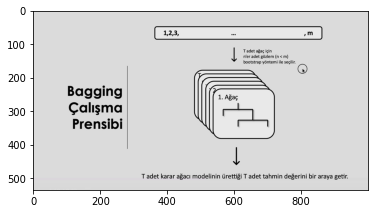

In [136]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread("bagtrees.png"))

In [137]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [138]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train) # modeli kurduk

BaggingRegressor(bootstrap_features=True)

In [139]:
bag_model.n_estimators # Birden fazla kaç ağaç var

10

In [140]:
bag_model.estimators_ # Her birisi birbirinden farklı ağaç

[DecisionTreeRegressor(random_state=1226492222),
 DecisionTreeRegressor(random_state=1678213587),
 DecisionTreeRegressor(random_state=1865117999),
 DecisionTreeRegressor(random_state=568562694),
 DecisionTreeRegressor(random_state=1717550938),
 DecisionTreeRegressor(random_state=1661473692),
 DecisionTreeRegressor(random_state=439043039),
 DecisionTreeRegressor(random_state=330785540),
 DecisionTreeRegressor(random_state=1644284216),
 DecisionTreeRegressor(random_state=1499766192)]

In [141]:
bag_model.estimators_samples_ # Her ağacın örnekleri

[array([ 61,  65, 171,  85,  80, 131,  63, 134,  66, 158,  19,  64, 143,
         98, 148,  48, 176,   1,  45,  90,  42, 174,   1, 163, 106,  85,
        192, 122, 123, 122,  93, 100,  46,   2,  92,  36,  80, 125, 150,
         66, 130, 169, 177, 124,  19, 141,  12, 194, 194, 165,  43, 186,
        116, 103,  79,  72, 159, 153,  19, 116, 160,  63,  84, 105, 171,
        118, 112,  44, 117,  28,  80, 136,  70,   3,  16,  66, 164,  96,
         84,  58, 114, 168, 163, 127, 120, 162, 104,  24, 139,  92, 170,
        128,  69, 117, 139,  64,  75, 111, 163,  80, 145,  45,  89,  83,
         44,  51,  90, 115, 134,  60,  11,  22,  57, 162, 160, 172,  90,
         57, 124, 144, 190, 183,  37,  40, 105,  29, 116, 150,   0, 165,
         21, 120,   3, 194,  34, 137,   8, 181, 196,  36, 138, 190, 156,
        135,  86, 187, 101,  59,  69, 136,  90, 149,  26, 140, 145,   0,
          6, 158,  62,  32, 110,  20, 165,  58, 114,  30, 137, 160,  24,
          9, 164,  97,  93,  70, 170, 102,  19, 121

In [142]:
bag_model.estimators_features_ # Her ağacın kullandığı bağımsız değişkenler

[array([ 0,  1,  7, 17,  5, 11,  2,  7,  4,  3, 12, 11, 14,  7, 11,  7,  4,
         2,  3]),
 array([ 8,  8, 18, 18,  7,  1, 11, 15, 13,  0,  1, 15, 18, 12,  6,  1, 12,
        14,  5]),
 array([15,  8,  1, 10, 18, 15,  8,  8, 14, 11, 10,  5, 10, 10,  8, 14,  0,
         5,  5]),
 array([ 6,  0, 11, 18,  9, 16, 17,  7, 16,  1,  1,  5, 13, 11,  2, 10, 12,
        11, 17]),
 array([12,  8,  2,  4, 18, 18,  5,  6, 18, 18, 12, 12,  9, 11, 10,  6, 13,
         6, 13]),
 array([ 8,  1, 18,  0,  9, 15, 10,  6,  4, 11,  9, 14, 13,  0,  2,  0,  7,
         8, 10]),
 array([15, 15,  0,  1,  2, 11, 12, 18,  4, 15, 17,  9,  9, 12,  9, 11, 11,
         8, 14]),
 array([ 4,  6,  5, 13,  2, 18,  7, 18,  5, 16, 10, 17, 13,  4,  2,  9,  8,
         2,  9]),
 array([ 2,  1, 17, 11,  8,  3,  7, 16,  6,  4,  2, 12, 11, 13,  8, 11,  0,
         9, 12]),
 array([16,  1,  3, 17,  3, 18,  0, 13, 16, 11, 17, 10, 11, 16,  0, 15, 10,
        15, 17])]

In [143]:
# Her modele özel değerler
bag_model.estimators_[0] # ilk modelin özellikleri

DecisionTreeRegressor(random_state=1226492222)

In [144]:
bag_model.estimators_[1]

DecisionTreeRegressor(random_state=1678213587)

## Tahmin

In [145]:
y_pred = bag_model.predict(X_test) # ilkel test hatası

In [146]:
np.sqrt(mean_squared_error(y_test, y_pred))

345.6797832335559

In [147]:
# Belirli bir ağacı seçerek test etme
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [148]:
np.sqrt(mean_squared_error(y_test, iki_y_pred)) # ikinci ağacın hata miktarı

446.38812257440276

In [149]:
yedi_y_pred = bag_model.estimators_[6].fit(X_train, y_train).predict(X_test)

In [150]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

524.9746214976982

# Model Tuning

Bagging methodolojisi bootstrap birleştirmesi yapmaktır. Herhangi bir ağacı bag ettiğimizde cart a uyguladğımızda ve değiken seçiminde random_state getirdiğimizde random forest yapmış oluruz.

Tahminci sayısını değiştirerek gözlemleme yapalım.

In [151]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [152]:
bag_params = {"n_estimators": range(2,20)}

In [154]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)
# cv = cross validation

In [155]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [156]:
bag_cv_model.best_params_

{'n_estimators': 13}

In [157]:
bag_tuned = BaggingRegressor( n_estimators = 13, random_state = 45)

In [158]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=13, random_state=45)

In [159]:
y_pred = bag_tuned.predict(X_test)

In [160]:
np.sqrt(mean_squared_error(y_test, y_pred))

351.75005432670355

# Random Forests

Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.

Rastgele ormanlar, karar ağaçlarının bir koleksiyonudur, ancak bazı farklılıklar gösterir. Bu algoritmada tek bir ağacın aksine birden fazla ağaç yetiştirilir. Sınıflandırma durumunda ormandaki tüm ağaçlar arasında en çok oyu alan seçilir. Regresyon durumunda, farklı ağaçların çıktılarının ortalamasını alır. Bu algoritma çok kararlıdır ve mevcut makine öğrenmesi sistemlerinin çoğunu oluşturan hem sınıflandırma hem de regresyon problemleri için kullanılabilir. Ancak sınıflandırmada regresyona göre daha başarılıdır. Hızlı bir şekilde eğitilebilir, ama bir kez eğitildiklerinde tahminler oluşturmak için oldukça yavaştır. Aşağıdaki alanlarda kullanılabilir.

* Görüntü Sınıflandırma
* Nesne algılama
* Nesne takibi
* Kenar algılama
* Anlamsal Bölümleme
* Yüz ifadesi tanıma

- Ağaçlar için gözlemler bootstrap rastgele örnek seçim yöntemi ile *değişkenler random subspace yöntemi ile seçilir.*


- Karar ağacını her bir düğümünde en iyi dallara ayırıcı (bilgi kazancı) değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.


- Ağaç oluşturmada veri setinin 2/3’ü kullanılır. Dışarıda kalan veri ağaçları, performansın test edilmesi ve değişken öneminin belirlenmesi için kullanılır.


- Her düğüm noktasında rastgele değişken seçimi yapılır.( regresyon’da p/3,sınıflandırma’da karekök p)


- Nihai tahmin için ağaçlardan tahmin değerleri talep edilirken her bir ağacın daha önce hesaplanan hata oranları göz önüne alınarak ağaçlara ağırlık verilir. Çok başarısız olan ağaçların tahmin değerlerini neredeyse önemsemez. Bu özellik Random Forests’ı , Bagging’ten ayıran en büyük özelliktir.


- Random Forests da eksik değerlerle başa çıkabilir. Bunu yapmasının iki yolu var; sürekli değişkenleri değiştirmek için medyan değeri kullanma ve eksik değerlerin yakınlık ağırlıklı ortalamasını hesaplama.

In [161]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [162]:
from sklearn.ensemble import RandomForestRegressor

In [163]:
rf_model = RandomForestRegressor(random_state = 42)

In [164]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Tahmin

In [165]:
rf_model.predict(X_test)[0:5]

array([ 740.62167,  895.99497, 1184.695  ,  139.65167,  634.75833])

In [166]:
y_pred = rf_model.predict(X_test)

In [167]:
np.sqrt(mean_squared_error(y_test, y_pred))

345.00286717448006

## Model Tuning

In [168]:
rf_params = {'max_depth': list(range(1,10)), # max derinlik
            'max_features': [3,5,10,15], # max özellik (veri setinde toplam 19 değişken var)
            'n_estimators' : [100, 200, 500, 1000, 2000]} # ağaç sayısı (itr sayısı)

In [169]:
rf_model = RandomForestRegressor(random_state = 42)

In [170]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

Ağaç sayısını 500 e çıkarıp cv = 10 parametrelerini seçtiğimizde işlem çok uzun sürecektir. Bilgisayarın işlemcisini tam performansla çalışmasını sağlamak için n_jobs argümanına -1 girilerek bilgisayarın soğutucusu devreye girer.

(50 Saat) Python A-Z™: Veri Bilimi ve Machine Learning eğitiminde Python 3.7 versiyonu kullanılır.

In [171]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [172]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 100}

In [173]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =100)

In [174]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=3)

In [175]:
y_pred = rf_tuned.predict(X_test)

In [176]:
np.sqrt(mean_squared_error(y_test, y_pred))

347.6236636233905

“Bagging ile Boosting yöntemlerinin en belirgin farkı, bagging yöntemlerinde ağaçların birbirlerine bağımlılıkları yoktur. Boosting yönteminde ise ağaçlar artıklar üzerine kurulur dolayısıyla ağaçların birbirlerine bağımlılıkları söz konusudur.”

Breiman, tıpkı Bagging tekniğinde rastgele gözlem birimleri üzerinden elde ettiği rastgeleliği, değişkenler için de edinmek amacıyla, değişkenlerde rastgele seçimler yaparak **Random Subspace** tekniğini geliştirmiştir.

In [177]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

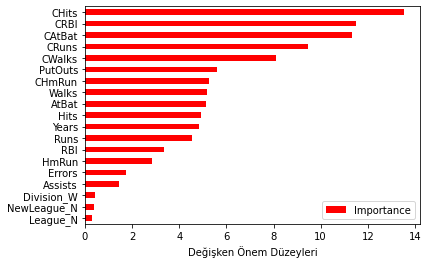

In [178]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Boosting Yöntemleri

Zayıf öğrenicileri bir araya getirip güçlü bir öğrenici ortaya çıkarmak fikrine dayanır.

# Adaptive Boosting (AdaBoost)

Zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturması fikrini hayata geçiren algoritmadır. Ağaçların birbirine bağımlılığı söz konusudur.

# Gradient Boosting Machines

AdaBoost'un sınıflandırma  ve regresyon problelerine kolayca uyarlanabilen genelleştirilmiş versiyonudur.

Artıklar üzerine tek bir tahminsel model formundaolan modeller serisi kurulur.

* Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur. 
* Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklanının/ hatalarının (residuals) üzerine kurularak (fit) oluşturulur. 
* GBM diferansiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient descent algoritmasını kullanmakta.
* GB bir çok temel öğrenici tipi (base learner type) kullanabilir. (Trees, linear terms, splines,...) 
* Cost fonksiyonları ve link fonksiyonları modifiye edilebilirdir. 
* Boosting+Gradient Descent

In [179]:
from sklearn.ensemble import GradientBoostingRegressor

In [180]:
gbm_model = GradientBoostingRegressor() # model kurma
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

## Tahmin

In [181]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

352.88368370114756

## Model Tuning

In [182]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [183]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

2400 deneme yaptığı için işlem uzun sürdü.

In [184]:
gbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 2000,
 'subsample': 0.75}

In [185]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [186]:
# Bu zamana kadar ki en düşük test hatası olabilir?
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

338.8060459215527

In [187]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

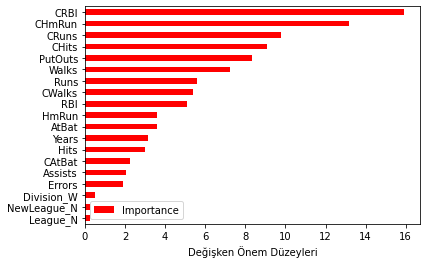

In [188]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XGBoost (eXtreme Gradient Boosting)

XGBoost, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir halidir. Spark ile kullanılabilir ve GPU desteği vardır.

* R, Python, Hadoop, Scala, Julia ile kullanılabilir. 
* Ölçeklenebilirdir.
* Hızlıdır. 
* Tahmin başarısı yüksektir. 
* Bir çok kaggle yarışmasında başarısını kanıtlamıştır.

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
#!pip install xgboost

In [ ]:
import xgboost as xgb
# xgboost da standart pandas dataframe ve numpy ları kullanmak yerine 
# xgb nin kendi veri yapısını kullanırsanız daha iyi performans alırsınız.

In [ ]:
DM_train = xgb.DMatrix(data = X_train, label = y_train) # label(bağımlı değişken)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor().fit(X_train, y_train)

## Tahmin

In [ ]:
# ilkel test hatası
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
xgb_model

- colsample_bytree parametresi ağaç başına değişkenlerden alınacak olan örnek oranıdır.
- Overfitting i engellemek için learning_rate (daraltma adım boyu) kullanırız. 
- learning_rate oranı küçültüldükçe tahmin süresini arttırmasına rağmen başarısını arttırır. 
- max_depth (karmaşıklık parametresi) overfitting in önüne geçer.
- n_estimators ise ağaç sayısı (itr sayısı) nı belirtir.

In [ ]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], #ağaç başına değişkenlerden alınacak olan örnek oranı
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

In [ ]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

In [ ]:
xgb_cv.best_params_

In [ ]:
# Tune Model
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 5, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# Light GBM

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [ ]:
#!pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
#conda install -c conda-forge lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

## Tahmin

In [ ]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
lgbm_model

In [ ]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [ ]:
lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# CatBoost

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

## Tahmin

In [ ]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [ ]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [ ]:
catb_cv_model.fit(X_train, y_train)

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [189]:
import sys
sys.version

'3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]'